# Quantitative DeFi: Data Sources

<br>

## 👾 👾 👾 👾 👾 👾 👾 👾 👾 👾 👾 👾 👾 👾 👾 👾 👾 👾 👾 
## ------------- PART I: EXTRACTION ----------------
## 👾 👾 👾 👾 👾 👾 👾 👾 👾 👾 👾 👾 👾 👾 👾 👾 👾 👾 👾 

<br>

## Sources

<br>

  - [yfinance](https://pypi.org/project/yfinance/)
  - [panda_datareader](https://pandas-datareader.readthedocs.io/en/latest/)
  - [alpha_advantage](https://www.alphavantage.co/)
  - [CoinAPI](https://www.coinapi.io/)
  - [quandl](https://blog.data.nasdaq.com/api-for-bitcoin-data)

<br>

### Dependencies

<br>

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import requests
import numpy as np
import pandas as pd

import mplfinance as mpf
import matplotlib.pyplot as plt

import quandl
import yfinance as yf
import pandas_datareader.data as web
from alpha_vantage.cryptocurrencies import CryptoCurrencies

<br>

### Parameters

<br>

In [2]:
SYMBOL = 'BTC'
START_DATE = '2019-01-01'
END_DATE = '2024-01-01'
INTERVAL = '1d'
TYPE = "av-daily"
TYPE_2 = "daily"
MARKET = 'USD'
PERIOD_ID = '1DAY'

ALPHAVANTAGE_API_KEY = ''
COINAPI_KEY = ''
QUANDL_KEY = ''

COIN_API_URL =  f'https://rest.coinapi.io/v1/exchangerate/{SYMBOL}/{MARKET}/history?period_id={PERIOD_ID}&time_start={START_DATE}T00:00:00&time_start={END_DATE}T00:00:00&limit=100000'
ALPHAVANTAGE_API_URL= f'https://www.alphavantage.co/query/'


<br>

### Util Methods

<br>

In [3]:
def generate_request(url, headers=None, params=None):

    response = requests.get(url, params=params, headers=headers)
    data = response.json()
    
    if response.status_code != 200 or "Error Message" in data:
        print(f'Request to {url} failed: {data}')
        return {}

    return data

In [4]:
def get_mean(data):
    return np.round(np.mean(data), 2)

def get_std(data):
    return np.round(np.std(data), 2)

def get_skew(data):
    return  np.round(skew(data), 2)

def get_kurtosis(data):
    return np.round(kurtosis(data), 2)

def get_pct(data):
    return data.pct_change().dropna()

def get_sharpe_ratio(data):
    return np.round(get_mean(data) / get_std(data), 2)

def get_rolling_max(data):
    return data.cummax()

def get_drawdown(data):
    return data - get_rolling_max(data)

def get_max_drawdown(data):
    return np.round(get_drawdown(data).min(), 2)

def get_25_quantile(data):
    return np.round(data.quantile(.25), 2)

def get_median(data):
    return np.round(data.quantile(.5), 2)

def get_75_quantile(data):
    return np.round(data.quantile(.75), 2)

<br>

### I. Data from pandas_datareader `Datareader()` (and alpha_advantage)

<br>

In [5]:
data_1 = web.DataReader(SYMBOL, TYPE, START_DATE, api_key=ALPHAVANTAGE_API_KEY)
df_1 = pd.DataFrame(data_1.to_records())

df_1 = df_1.drop(columns=["volume"])

df_1['index'] = pd.to_datetime(df_1['index']).dt.strftime('%Y-%m-%d')
df_1 = df_1.set_index('index')
df_1.index.names = ['date']

df_1.sort_index(ascending=True, inplace=True)
df_1.dropna()

df_1

,open,high,low,close
date,,,,
2020-10-02,100.0800,100.0800,100.0500,100.0550
2020-10-05,100.0300,100.0400,99.9950,99.9950
2020-10-06,100.0100,100.0300,100.0100,100.0300
2020-10-07,99.9500,99.9600,99.9200,99.9200
2020-10-08,99.9900,99.9950,99.9717,99.9950
...,...,...,...,...
2024-03-11,92.4100,92.4100,92.3800,92.3800
2024-03-12,92.1906,92.1906,92.1906,92.1906
2024-03-13,92.1119,92.1119,92.1119,92.1119


<br>

### II. Data from yfinance `history()`

<br>

In [6]:
ticker = yf.Ticker(SYMBOL)
data_2 = ticker.history(start=START_DATE, interval=INTERVAL)
df_2 = pd.DataFrame(data_2.to_records())

df_2 = df_2.drop(columns=["Dividends", "Stock Splits", "Capital Gains"])
df_2 = df_2.rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume': 'volume'})

df_2['Date'] = pd.to_datetime(df_2['Date'].dt.strftime('%Y-%m-%d'))
df_2 = df_2.set_index('Date')
df_2.index.names = ['date']

df_2.sort_index(ascending=True, inplace=True)
df_2.dropna()

df_2

,open,high,low,close,volume
date,,,,,
2020-10-01,96.285767,96.285767,96.285767,96.285767,0
2020-10-02,96.285767,96.285767,96.285767,96.285767,0
2020-10-05,96.314649,96.324279,96.280952,96.280952,10725
2020-10-06,96.295405,96.314659,96.295405,96.314659,10080
2020-10-07,96.237625,96.247255,96.208740,96.208740,6350
...,...,...,...,...,...
2024-03-11,92.409599,92.409599,92.379997,92.379997,228
2024-03-12,92.190598,92.190598,92.190598,92.190598,286
2024-03-13,92.111900,92.111900,92.111900,92.111900,2


In [7]:
ticker.history_metadata

{'currency': 'USD',
 'symbol': 'BTC',
 'exchangeName': 'PCX',
 'instrumentType': 'ETF',
 'firstTradeDate': 1601559000,
 'regularMarketTime': 1620674710,
 'hasPrePostMarketData': True,
 'gmtoffset': -14400,
 'timezone': 'EDT',
 'exchangeTimezoneName': 'America/New_York',
 'regularMarketPrice': 99.11,
 'chartPreviousClose': 100.0,
 'priceHint': 2,
 'currentTradingPeriod': {'pre': {'timezone': 'EDT',
   'start': 1710748800,
   'end': 1710768600,
   'gmtoffset': -14400},
  'regular': {'timezone': 'EDT',
   'start': 1710768600,
   'end': 1710792000,
   'gmtoffset': -14400},
  'post': {'timezone': 'EDT',
   'start': 1710792000,
   'end': 1710806400,
   'gmtoffset': -14400}},
 'dataGranularity': '1d',
 'range': '',
 'validRanges': ['1d',
  '5d',
  '1mo',
  '3mo',
  '6mo',
  '1y',
  '2y',
  '5y',
  'ytd',
  'max']}

In [8]:
len(ticker.news), ticker.news[0]

(8,
 {'uuid': '2dc6dacc-b660-3fd5-869d-2a295b4ac52c',
  'title': 'Hot New Bitcoin Funds Are Still Waiting for Buy-In from Financial Advisers',
  'publisher': 'The Wall Street Journal',
  'link': 'https://finance.yahoo.com/m/2dc6dacc-b660-3fd5-869d-2a295b4ac52c/hot-new-bitcoin-funds-are.html',
  'providerPublishTime': 1710362640,
  'type': 'STORY',
  'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/xrJVZDSBJifJfTj7G5N5oA--~B/aD02NDA7dz0xMjgwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/wsj.com/a50895cf2ea4395f03a727469a76053d',
     'width': 1280,
     'height': 640,
     'tag': 'original'},
    {'url': 'https://s.yimg.com/uu/api/res/1.2/cw_4CAc8.kzuPBerqlvnZw--~B/Zmk9ZmlsbDtoPTE0MDtweW9mZj0wO3c9MTQwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/wsj.com/a50895cf2ea4395f03a727469a76053d',
     'width': 140,
     'height': 140,
     'tag': '140x140'}]},
  'relatedTickers': ['HOOD', 'GBTC']})

<br>

### III. Data from yfinance `download()`
<br>

In [9]:
data_3 = yf.download([SYMBOL], start=START_DATE)
df_3 = pd.DataFrame(data_3.to_records())

df_3 = df_3.drop(columns=["Adj Close"])
df_3 = df_3.rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume': 'volume'})

df_3['Date'] = pd.to_datetime(df_3['Date'].dt.strftime('%Y-%m-%d'))
df_3 = df_3.set_index('Date')
df_3.index.names = ['date']

df_3.sort_index(ascending=True, inplace=True)
df_3.dropna()

df_3

[*********************100%%**********************]  1 of 1 completed


,open,high,low,close,volume
date,,,,,
2020-10-01,100.000000,100.000000,100.000000,100.000000,0
2020-10-02,100.000000,100.000000,100.000000,100.000000,0
2020-10-05,100.029999,100.040001,99.995003,99.995003,10725
2020-10-06,100.010002,100.029999,100.010002,100.029999,10080
2020-10-07,99.949997,99.959999,99.919998,99.919998,6350
...,...,...,...,...,...
2024-03-11,92.409599,92.409599,92.379997,92.379997,228
2024-03-12,92.190598,92.190598,92.190598,92.190598,286
2024-03-13,92.111900,92.111900,92.111900,92.111900,2


<br>

### IV. Data from alpha_advantage `CryptoCurrencies()`

<br>

In [10]:
params = {
    "function": "CURRENCY_EXCHANGE_RATE",
    "from_currency": SYMBOL,
    "to_currency": MARKET,
    "apikey": ALPHAVANTAGE_API_KEY,
}

data_4 = generate_request(ALPHAVANTAGE_API_URL, params)
df_4 = pd.DataFrame(data_4)
if not df_4.empty:
    df_4 = pd.DataFrame(data_4.to_records())
    
    df_4 = df_4.drop(columns=["1b. open (USD)", "2b. high (USD)", "3b. low (USD)", "4b. close (USD)", "6. market cap (USD)"])
    df_4 = df_4.rename(columns={'1a. open (USD)': 'open', '2a. high (USD)': 'high', "5. volume": 'volume', '3a. low (USD)': 'low', '4a. close (USD)': 'close'})
    
    df_4['date'] = pd.to_datetime(df_4['date'].dt.strftime('%Y-%m-%d'))
    df_4 = df_4.set_index('date')
    
    df_4.sort_index(ascending=True, inplace=True)
    df_4.dropna()
    
    df_4

Request to https://www.alphavantage.co/query/ failed: {'Error Message': 'the parameter apikey is invalid or missing. Please claim your free API key on (https://www.alphavantage.co/support/#api-key). It should take less than 20 seconds.'}


<br>

### V. Data from CoinAPI

<br>

In [11]:
headers = {'X-CoinAPI-Key': COINAPI_KEY}
params = {
    'asset_id_base': SYMBOL,
    'asset_id_quote': MARKET,
    'period_id': PERIOD_ID,
    'time_start': START_DATE,
    'time_end': END_DATE,
    
}

data_5 = generate_request(COIN_API_URL, headers, params)
df_5 = pd.DataFrame(data_5)

df_5 = df_5.drop(columns=["time_period_end", "time_period_start", "time_period_end", "time_period_end", "time_open"])
df_5 = df_5.rename(columns={'rate_open': 'open', 'rate_high': 'high', 'rate_low': 'low', 'rate_close': 'close'})

df_5['time_close'] = pd.to_datetime(df_5['time_close']).dt.strftime('%Y-%m-%d')
df_5 = df_5.set_index('time_close')
df_5.index.names = ['date']

df_5.sort_index(ascending=True, inplace=True)
df_5.dropna()

df_5

,open,high,low,close
date,,,,
2019-01-01,3691.054577,3828.189971,3648.024485,3813.724043
2019-01-02,3831.132665,3912.376103,3778.348116,3888.637329
2019-01-03,3889.798605,3891.685901,3764.756425,3785.973167
2019-01-04,3784.683946,3850.564931,3734.272675,3826.806638
2019-01-05,3820.064799,3864.705604,3780.647810,3794.363658
...,...,...,...,...
2020-07-29,10949.558337,11346.869509,10860.259971,11109.351265
2020-07-30,11103.708591,11186.542906,10866.253222,11112.422548
2020-07-31,11135.980102,11459.418801,10978.697902,11341.001771


<br>

### VI. Data from Quandl

<br>

In [12]:
quandl.ApiConfig.api_key = QUANDL_KEY
QUANDL_SYMBOL = "BITSTAMP/USD"

data_6 = quandl.get(QUANDL_SYMBOL)
df_6 = pd.DataFrame(data_6.to_records())

df_6 = df_6.drop(columns=["Ask", "VWAP"])
df_6 = df_6.rename(columns={'Bid': 'open', 'High': 'high', 'Low': 'low', 'Last': 'close', 'Volume': 'volume'})

df_6['Date'] = pd.to_datetime(df_6['Date'].dt.strftime('%Y-%m-%d'))
df_6 = df_6.set_index('Date')
df_6.index.names = ['date']

df_6.sort_index(ascending=True, inplace=True)
df_6.dropna()

df_6

,high,low,close,open,volume
date,,,,,
2014-04-15,515.00,453.16,499.01,500.01,28535.844106
2014-04-16,548.00,494.02,534.00,535.01,31159.941300
2014-04-17,537.24,481.63,506.52,504.70,21126.375080
2014-04-18,508.43,470.00,487.00,484.14,11879.484756
2014-04-19,507.43,472.81,504.74,504.74,10262.195861
...,...,...,...,...,...
2021-06-16,40506.59,38333.00,38575.47,38520.62,3845.249032
2021-06-17,39553.05,37350.00,37963.82,37913.00,3637.470886
2021-06-18,38208.68,35143.68,35596.79,35590.45,4265.269101


<br>

## 👾 👾 👾 👾 👾 👾 👾 👾 👾 👾 👾 👾 👾 👾 👾 👾 👾 👾 👾 
## ---------- PART II: CHECKING THE DATA -----------
## 👾 👾 👾 👾 👾 👾 👾 👾 👾 👾 👾 👾 👾 👾 👾 👾 👾 👾 👾 

<br>

<br>

### I. Mean, Skew, and Kurtosis

<br>

In [13]:
data_sets = []
data_frames = [df_1, df_2, df_3, df_4, df_5, df_6]
for d in data_frames:
    if not d.empty:
        data_sets.append(d.close)

In [14]:
i = 1
for data in data_sets:
    mean = get_mean(data)
    std = get_std(data)
    
    print(f'data_{i} -> mean: {mean}, std: {std}')
    i += 1

data_1 -> mean: 94.77, std: 3.8
data_2 -> mean: 92.17, std: 2.98
data_3 -> mean: 94.78, std: 3.8
data_4 -> mean: 7840.66, std: 2330.88
data_5 -> mean: 7404.23, std: 11614.8


<br>

### II. Other Stats

<br>

In [15]:
i = 1
for data in data_sets:
    
    print(f'data_{i}:')
    print(f'      - sharpe ratio: {get_sharpe_ratio(data)}')
    print(f'      - max drawndown: {get_max_drawdown(data)}')
    print(f'      - 25 quantile: {get_25_quantile(data)}')
    print(f'      - median: {get_median(data)}')
    print(f'      - 75 quantile: {get_75_quantile(data)}')
    i += 1

data_1:
      - sharpe ratio: 24.94
      - max drawndown: -11.72
      - 25 quantile: 91.57
      - median: 93.28
      - 75 quantile: 98.97
data_2:
      - sharpe ratio: 30.93
      - max drawndown: -10.21
      - 25 quantile: 89.71
      - median: 91.59
      - 75 quantile: 95.4
data_3:
      - sharpe ratio: 24.94
      - max drawndown: -11.72
      - 25 quantile: 91.57
      - median: 93.28
      - 75 quantile: 98.98
data_4:
      - sharpe ratio: 3.36
      - max drawndown: -8080.16
      - 25 quantile: 6419.48
      - median: 8316.54
      - 75 quantile: 9529.5
data_5:
      - sharpe ratio: 0.64
      - max drawndown: -29860.35
      - 25 quantile: 482.73
      - median: 3900.4
      - 75 quantile: 9084.99


<br>

### III. Percentage Change

<br>

In [16]:
i = 1
for data in data_sets:
    
    pct = pd.DataFrame(get_pct(data))
    print(f'data_{i}:')
    print(pct)
    i += 1

data_1:
               close
date                
2020-10-05 -0.000600
2020-10-06  0.000350
2020-10-07 -0.001100
2020-10-08  0.000751
2020-10-09 -0.000550
...              ...
2024-03-11 -0.000863
2024-03-12 -0.002050
2024-03-13 -0.000854
2024-03-14 -0.003332
2024-03-15 -0.000815

[867 rows x 1 columns]
data_2:
               close
date                
2020-10-02  0.000000
2020-10-05 -0.000050
2020-10-06  0.000350
2020-10-07 -0.001100
2020-10-08  0.000751
...              ...
2024-03-11 -0.000863
2024-03-12 -0.002050
2024-03-13 -0.000854
2024-03-14 -0.003332
2024-03-15 -0.000815

[868 rows x 1 columns]
data_3:
               close
date                
2020-10-02  0.000000
2020-10-05 -0.000050
2020-10-06  0.000350
2020-10-07 -0.001100
2020-10-08  0.000751
...              ...
2024-03-11 -0.000863
2024-03-12 -0.002050
2024-03-13 -0.000854
2024-03-14 -0.003332
2024-03-15 -0.000815

[868 rows x 1 columns]
data_4:
               close
date                
2019-01-02  0.019643
2019-01-03 -0.

<br>

### III. Plot Prices

<br>

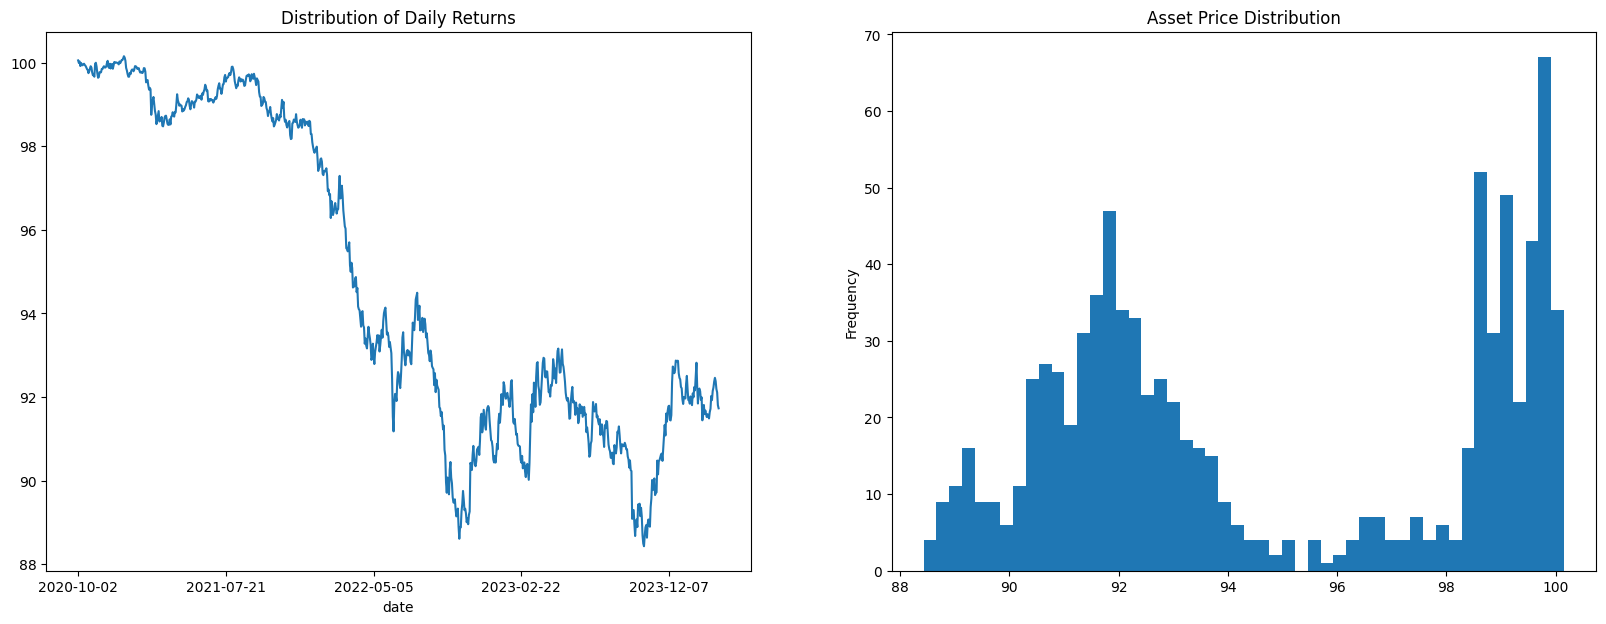

In [17]:
if not df_1.empty:
    fig, ax = plt.subplots(1, 2, figsize = (20, 7))
    df_1.close.plot(title = "Distribution of Daily Returns", ax = ax[0])
    df_1.close.plot.hist(title = "Asset Price Distribution", ax = ax[1], bins = 50)

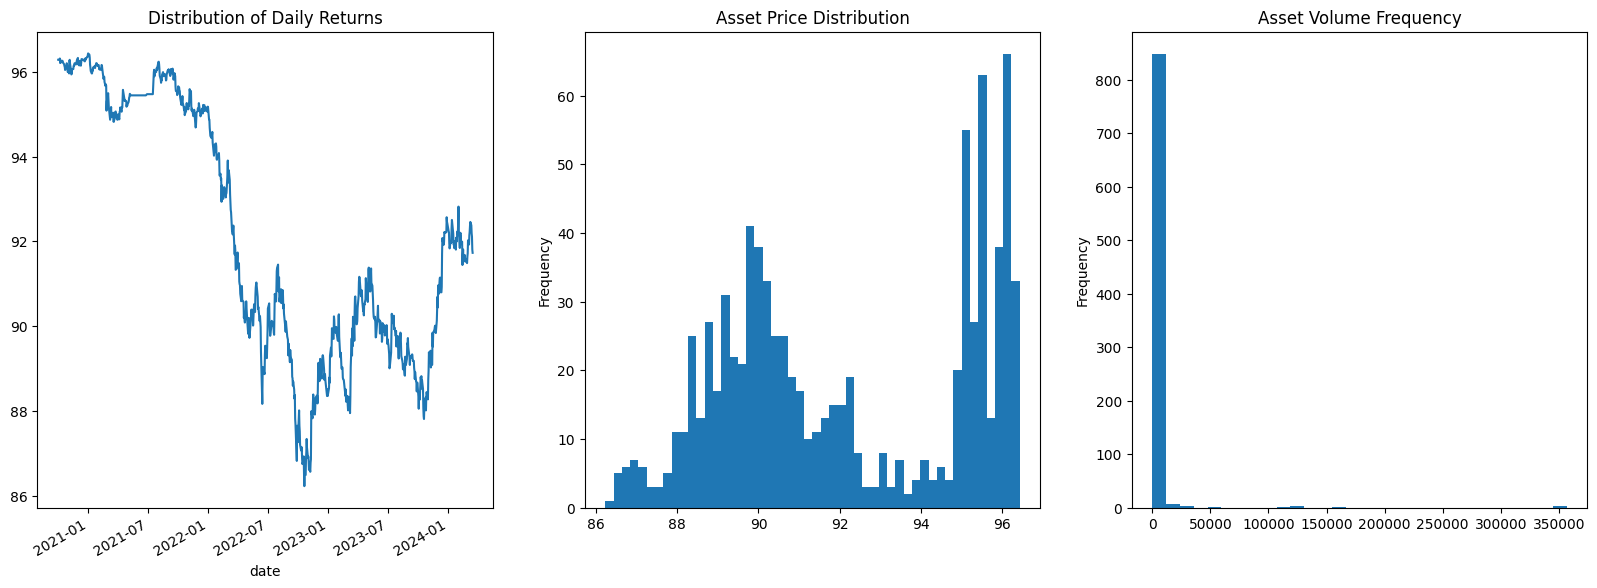

In [18]:
if not df_2.empty:
    fig, ax = plt.subplots(1, 3, figsize = (20, 7))
    df_2.close.plot(title = "Distribution of Daily Returns", ax = ax[0])
    df_2.close.plot.hist(title = "Asset Price Distribution", ax = ax[1], bins = 50)
    df_2.volume.plot.hist(title = "Asset Volume Frequency", ax = ax[2], bins = 30)

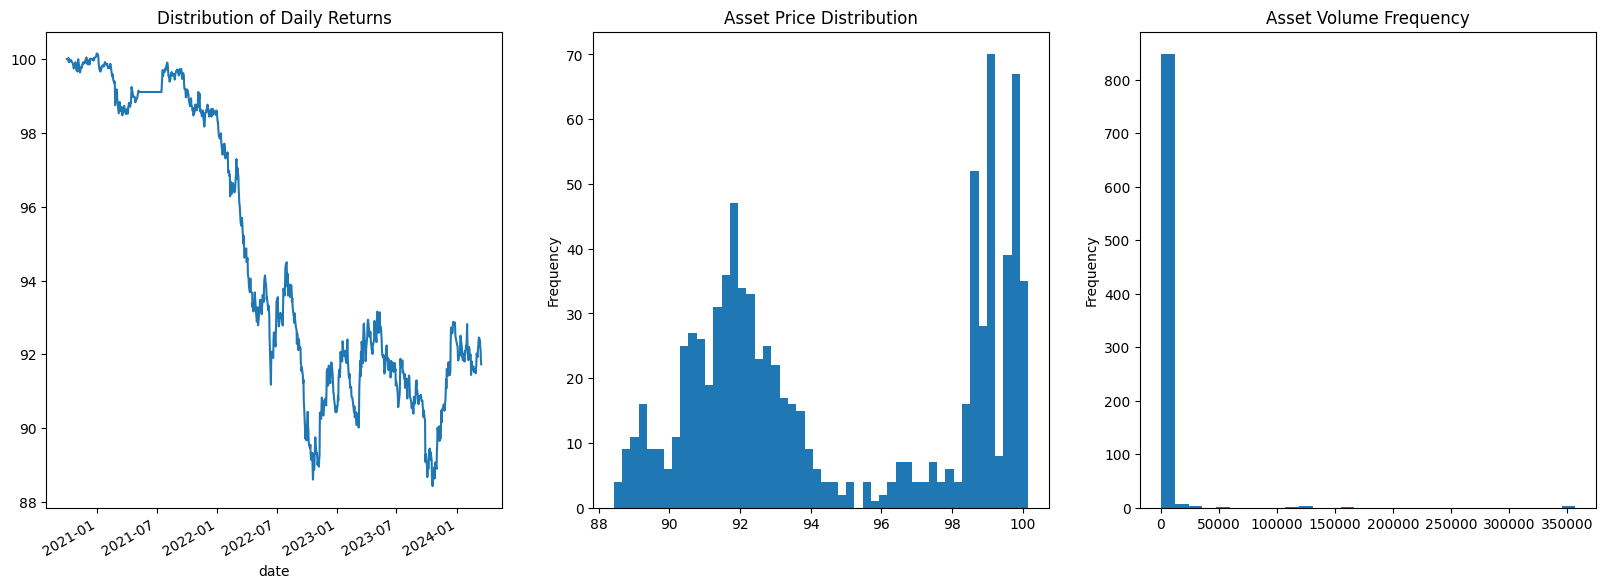

In [19]:
if not df_3.empty:
    fig, ax = plt.subplots(1, 3, figsize = (20, 7))
    df_3.close.plot(title = "Distribution of Daily Returns", ax = ax[0])
    df_3.close.plot.hist(title = "Asset Price Distribution", ax = ax[1], bins = 50)
    df_3.volume.plot.hist(title = "Asset Volume Frequency", ax = ax[2], bins = 30)

In [20]:
if not df_4.empty:
    fig, ax = plt.subplots(1, 3, figsize = (20, 7))
    df_4.close.plot(title = "Distribution of Daily Returns", ax = ax[0])
    df_4.close.plot.hist(title = "Asset Price Distribution", ax = ax[1], bins = 50)
    df_4.volume.plot.hist(title = "Asset Volume Frequency", ax = ax[2], bins = 30)

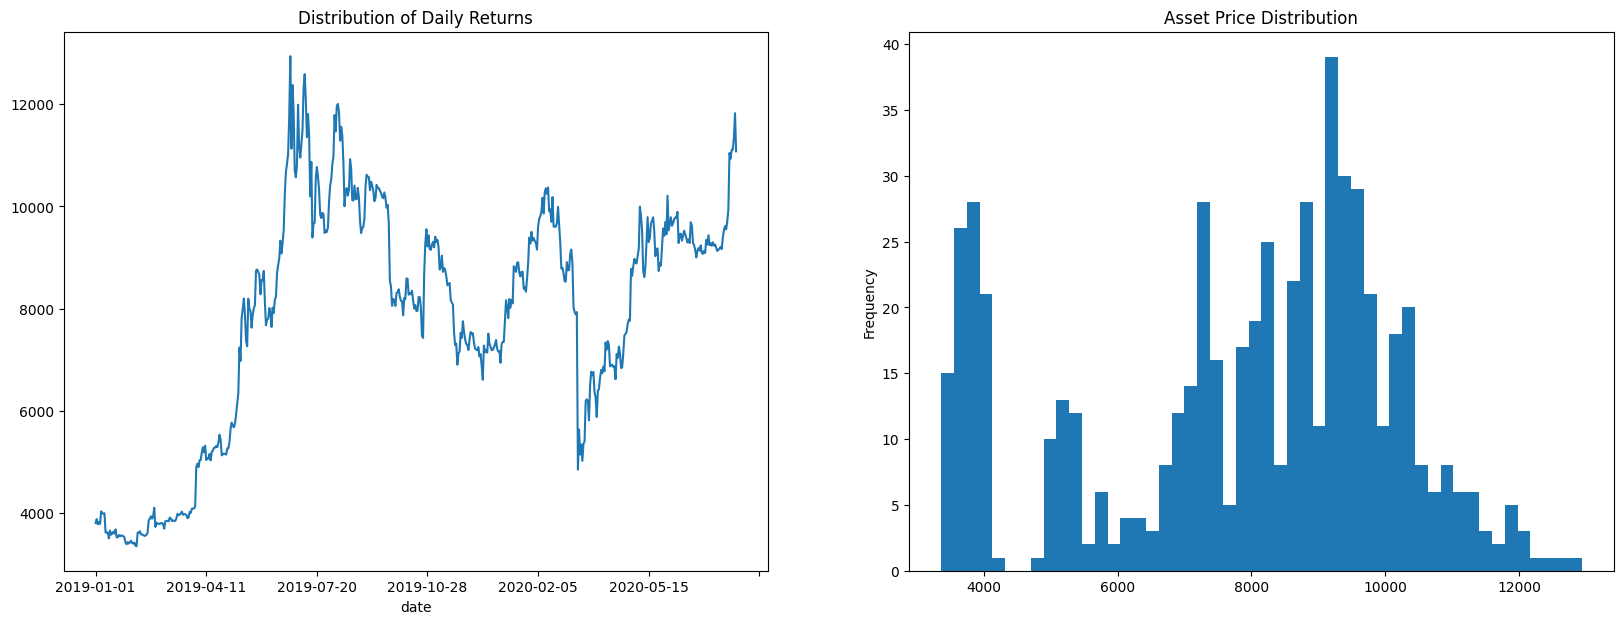

In [21]:
if not df_5.empty:
    fig, ax = plt.subplots(1, 2, figsize = (20, 7))
    df_5.close.plot(title = "Distribution of Daily Returns", ax = ax[0])
    df_5.close.plot.hist(title = "Asset Price Distribution", ax = ax[1], bins = 50)

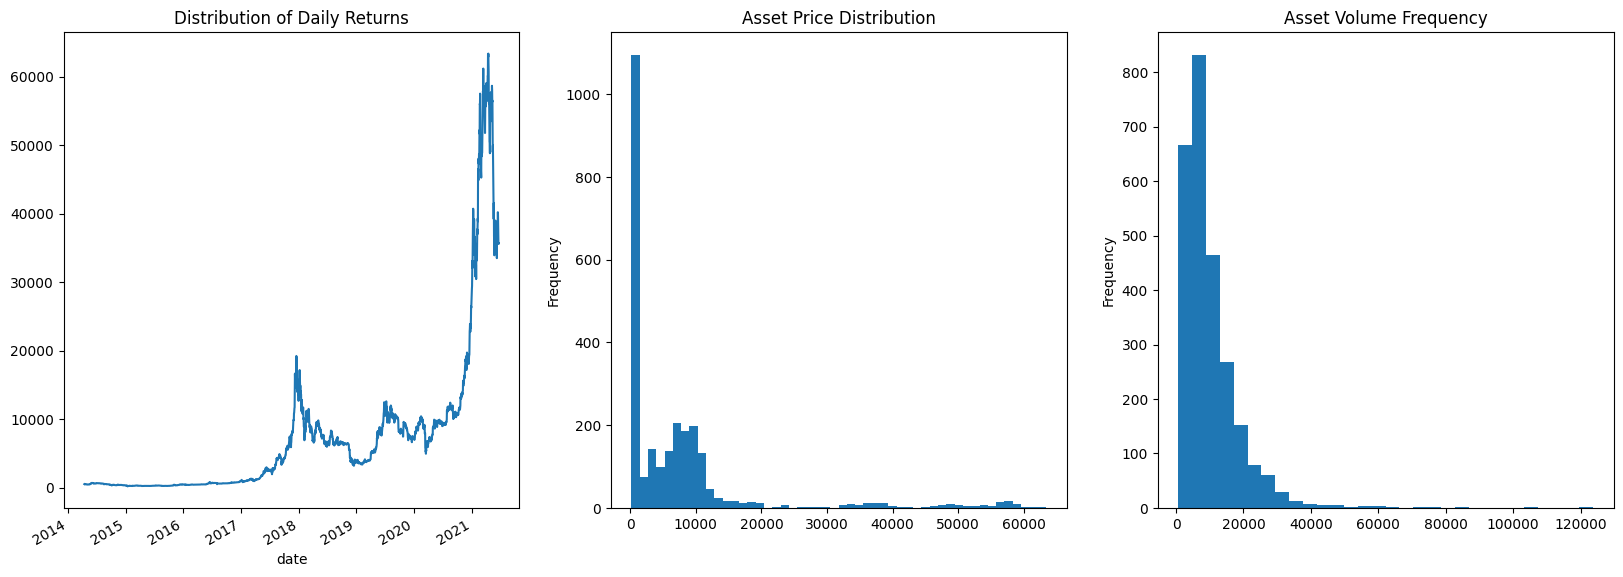

In [22]:
if not df_6.empty:
    fig, ax = plt.subplots(1, 3, figsize = (20, 7))
    df_6.close.plot(title = "Distribution of Daily Returns", ax = ax[0])
    df_6.close.plot.hist(title = "Asset Price Distribution", ax = ax[1], bins = 50)
    df_6.volume.plot.hist(title = "Asset Volume Frequency", ax = ax[2], bins = 30)

<br>

### IV. Plot Return

<br>

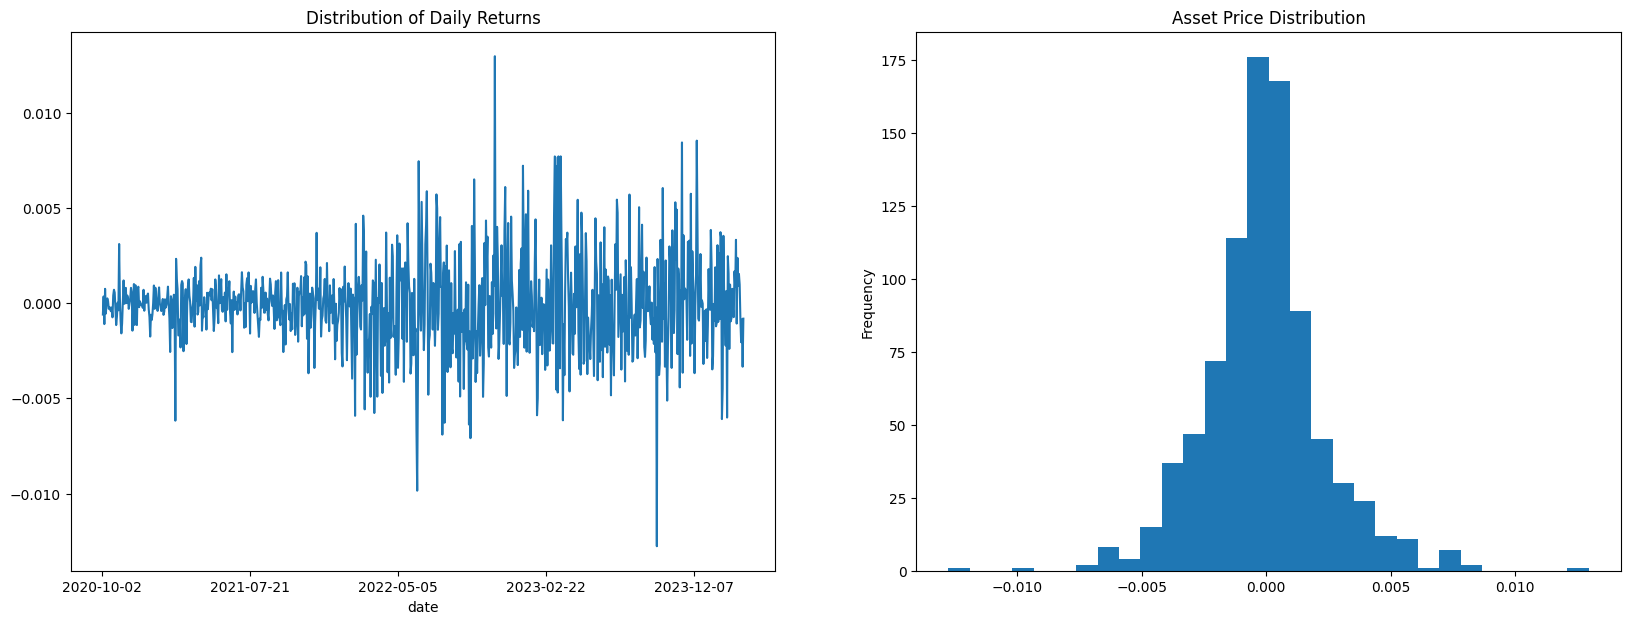

In [23]:
if not df_1.empty:
    lr_1 = df_1.close.apply(np.log).diff(1)
    fig, ax = plt.subplots(1, 2, figsize = (20, 7))
    lr_1.plot(title = "Distribution of Daily Returns", ax = ax[0])
    lr_1.plot.hist(title = "Asset Price Distribution", ax = ax[1], bins = 30)

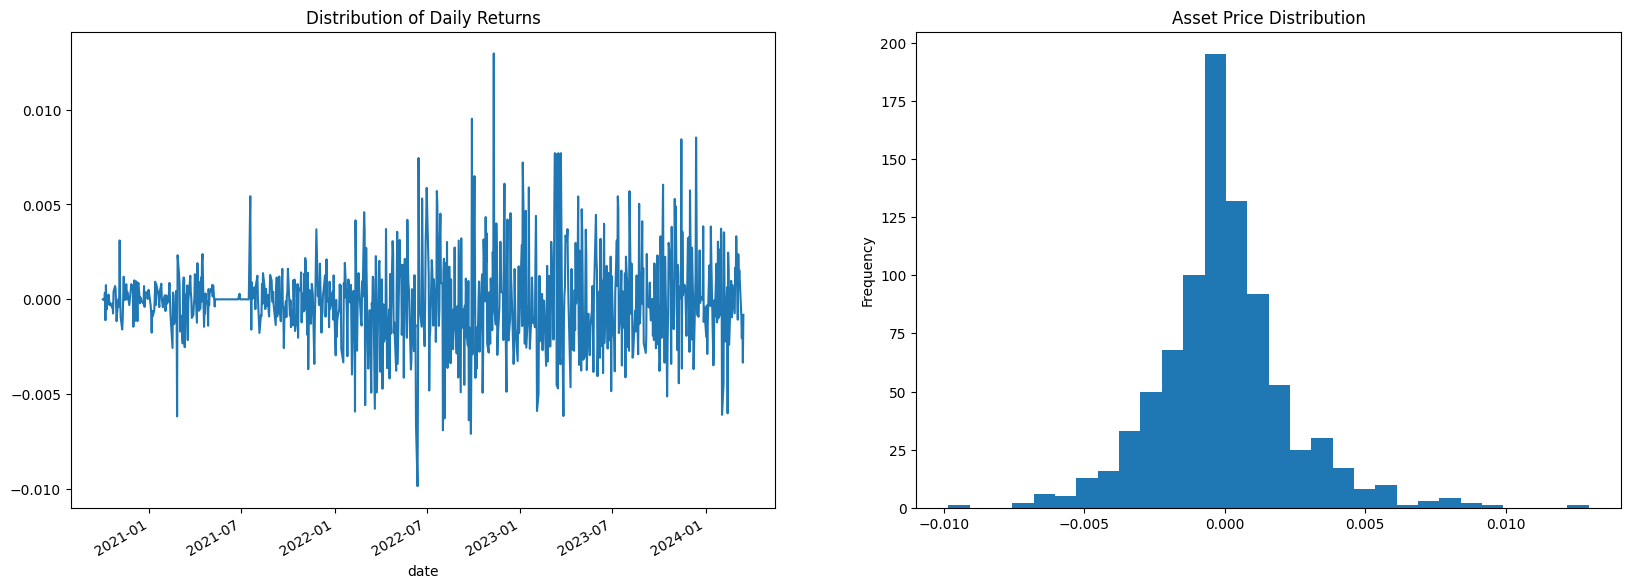

In [24]:
if not df_2.empty:
    lr_2 = df_2.close.apply(np.log).diff(1)
    fig, ax = plt.subplots(1, 2, figsize = (20, 7))
    lr_2.plot(title = "Distribution of Daily Returns", ax = ax[0])
    lr_2.plot.hist(title = "Asset Price Distribution", ax = ax[1], bins = 30)

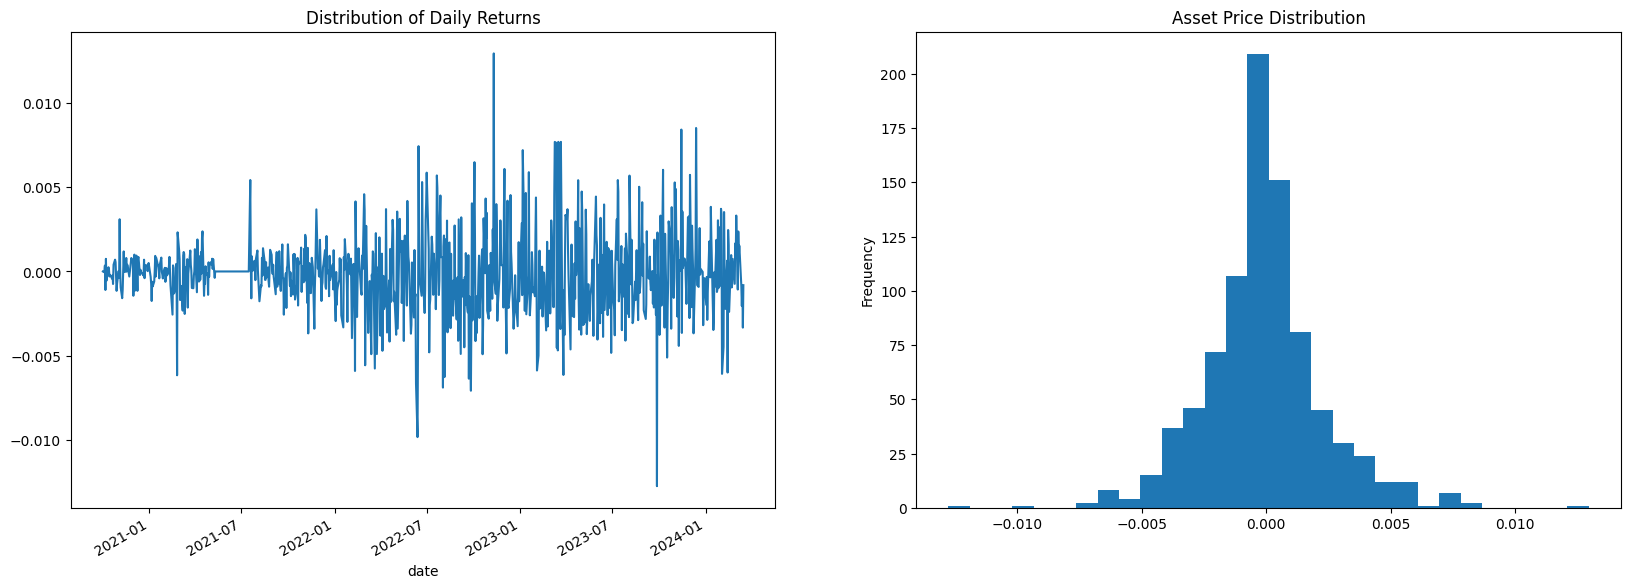

In [25]:
if not df_3.empty:
    lr_3 = df_3.close.apply(np.log).diff(1)
    fig, ax = plt.subplots(1, 2, figsize = (20, 7))
    lr_3.plot(title = "Distribution of Daily Returns", ax = ax[0])
    lr_3.plot.hist(title = "Asset Price Distribution", ax = ax[1], bins = 30)

In [26]:
if not df_4.empty:
    lr_4 = df_4.close.apply(np.log).diff(1)
    fig, ax = plt.subplots(1, 2, figsize = (20, 7))
    lr_4.plot(title = "Distribution of Daily Returns", ax = ax[0])
    lr_4.plot.hist(title = "Asset Price Distribution", ax = ax[1], bins = 30)

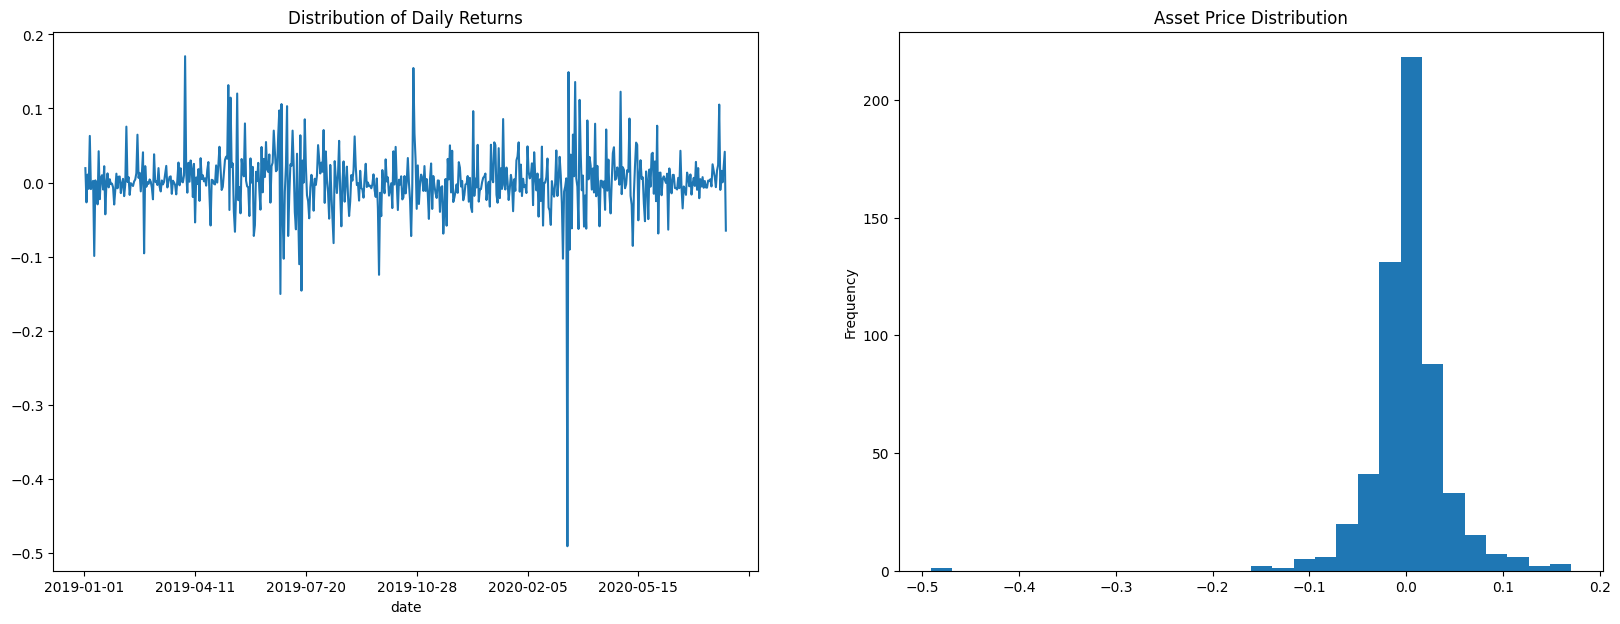

In [27]:
if not df_5.empty:
    lr_5 = df_5.close.apply(np.log).diff(1)
    fig, ax = plt.subplots(1, 2, figsize = (20, 7))
    lr_5.plot(title = "Distribution of Daily Returns", ax = ax[0])
    lr_5.plot.hist(title = "Asset Price Distribution", ax = ax[1], bins = 30)

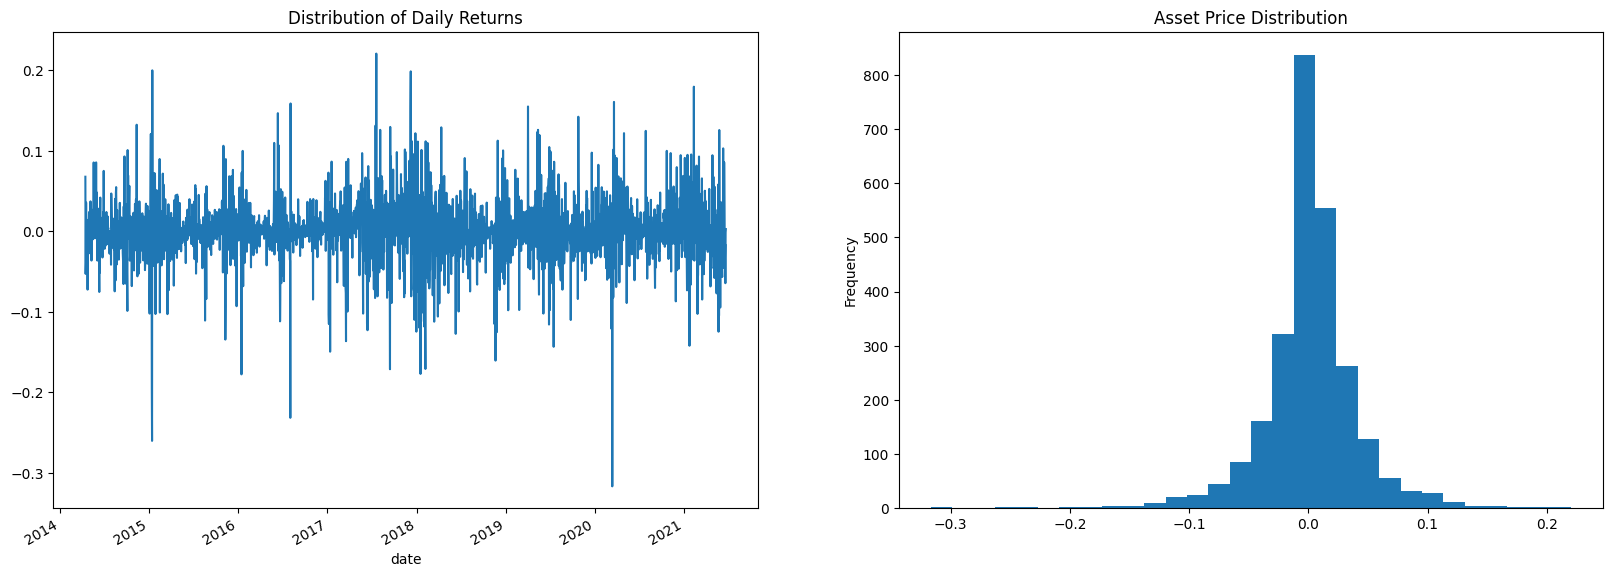

In [28]:
if not df_6.empty:
    lr_6 = df_6.close.apply(np.log).diff(1)
    fig, ax = plt.subplots(1, 2, figsize = (20, 7))
    lr_6.plot(title = "Distribution of Daily Returns", ax = ax[0])
    lr_6.plot.hist(title = "Asset Price Distribution", ax = ax[1], bins = 30)

<br>

### IV. Candle (for Yahoo)

<br>

In [29]:
START = "2023-07-01"
END = "2024-01-01"

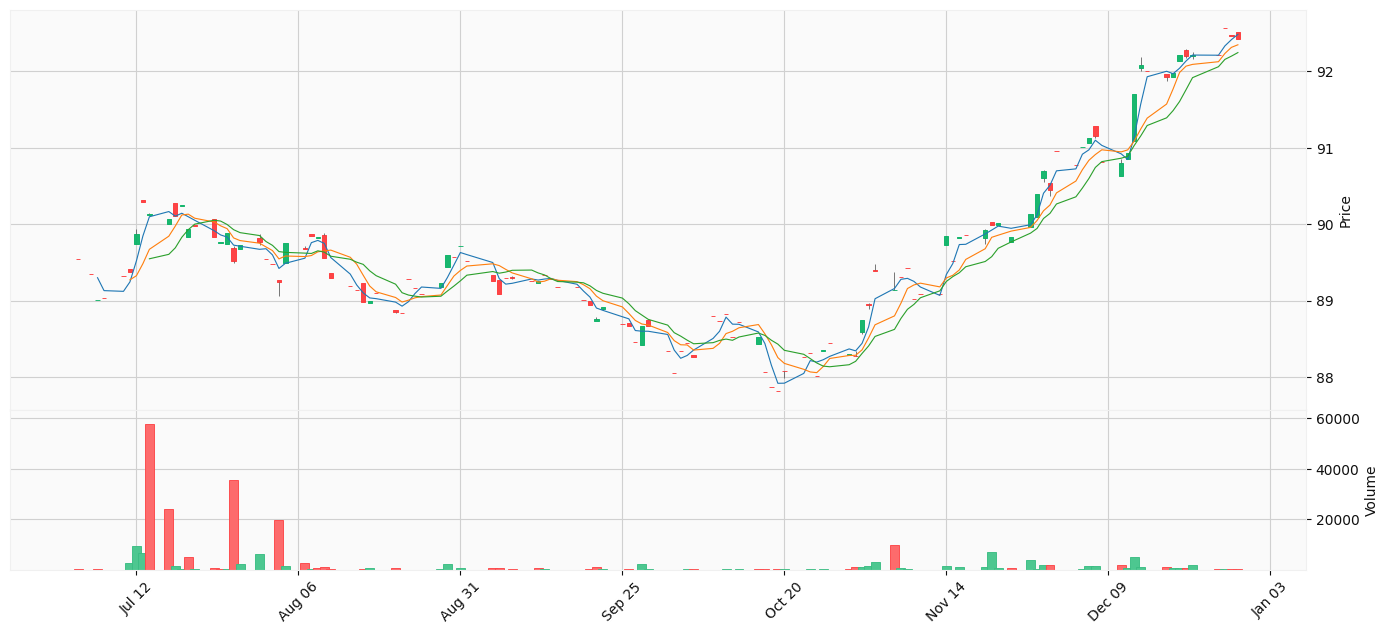

In [30]:
if not data_2.empty:
    mpf.plot(
        data_2[START: END],
        type ="candle",
        mav=(3, 6, 9),
        volume=True,
        style="yahoo",
        show_nontrading=True,
        figsize=(18, 8),
    )

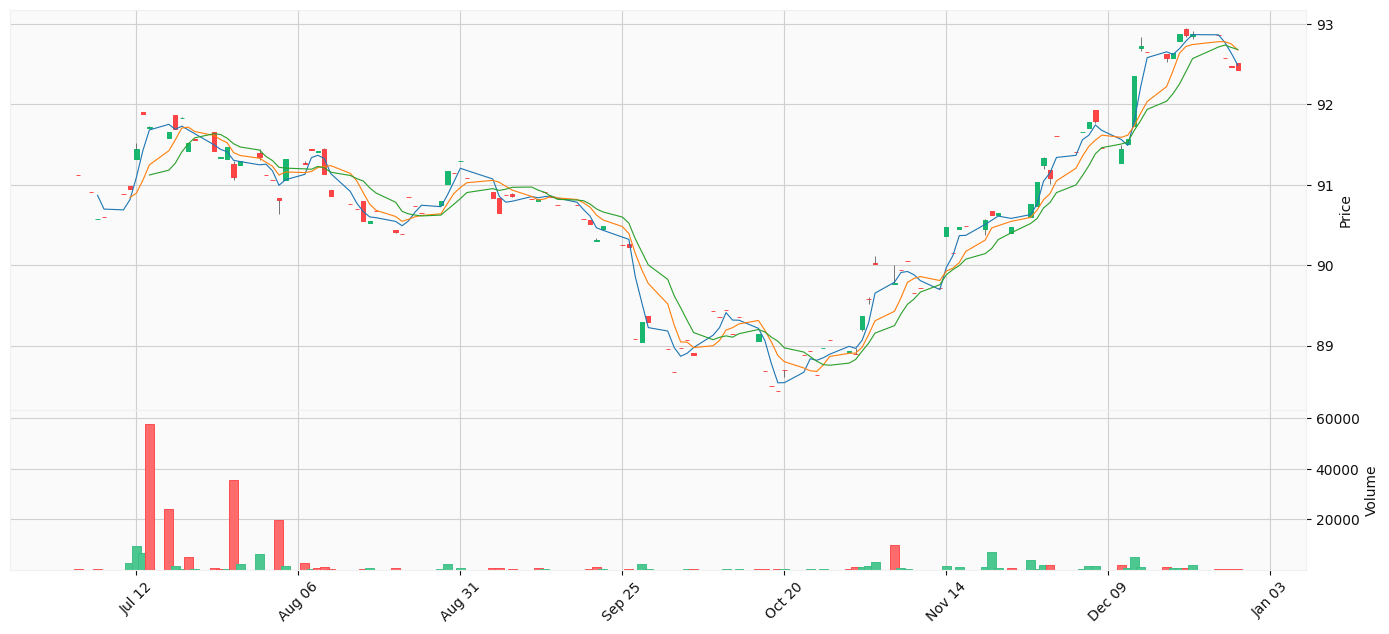

In [31]:
if not data_3.empty:
    mpf.plot(
        data_3[START: END],
        type ="candle",
        mav=(3, 6, 9),
        volume=True,
        style="yahoo",
        show_nontrading=True,
        figsize=(18, 8),
    )

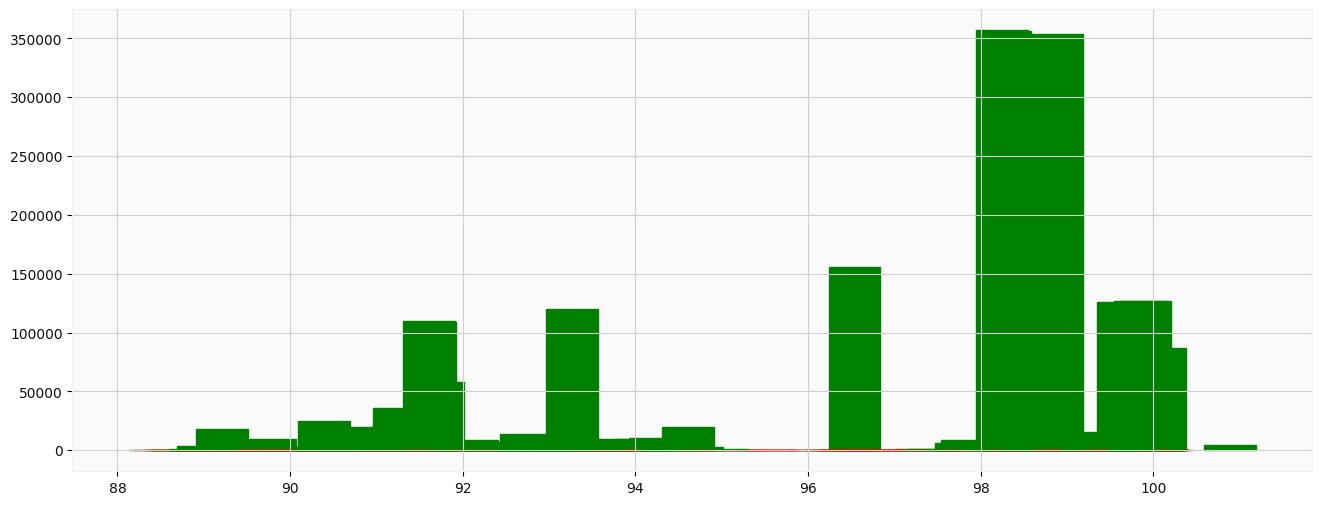

In [32]:
from mplfinance.original_flavor import candlestick_ohlc
if not data_1.empty:
    _, ax = plt.subplots(1, 1, figsize=(16, 6))
    candlestick_ohlc(
        ax, 
        data_1.values,
        width=0.6, 
        colorup='g',
        colordown='r'
    );

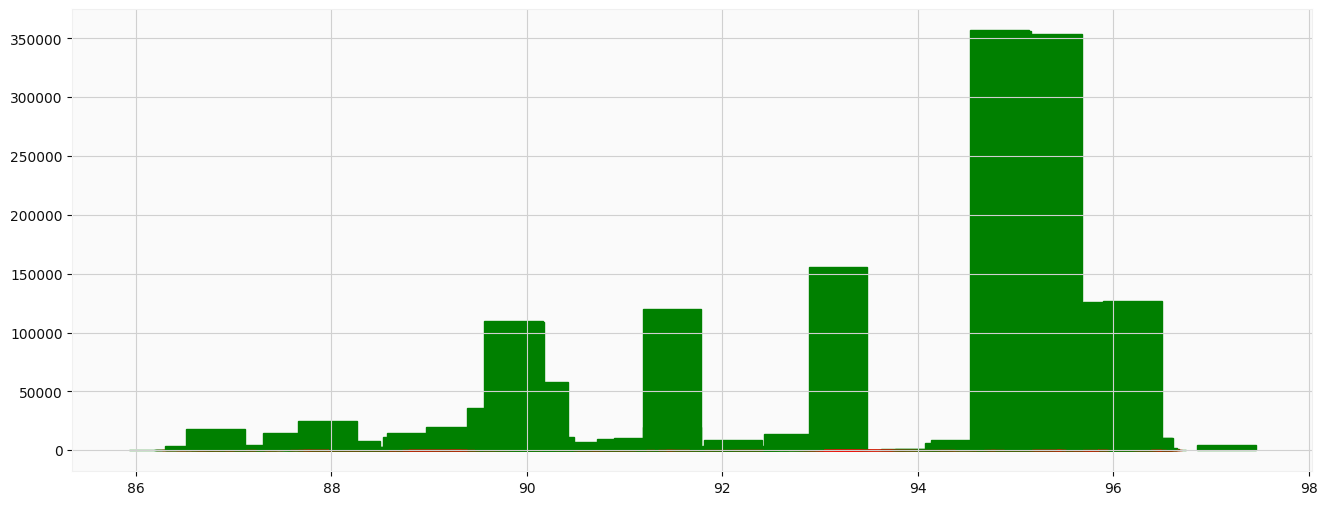

In [33]:
from mplfinance.original_flavor import candlestick_ohlc
if not data_2.empty:
    _, ax = plt.subplots(1, 1, figsize=(16, 6))
    candlestick_ohlc(
        ax, 
        data_2.values,
        width=0.6, 
        colorup='g',
        colordown='r'
    );

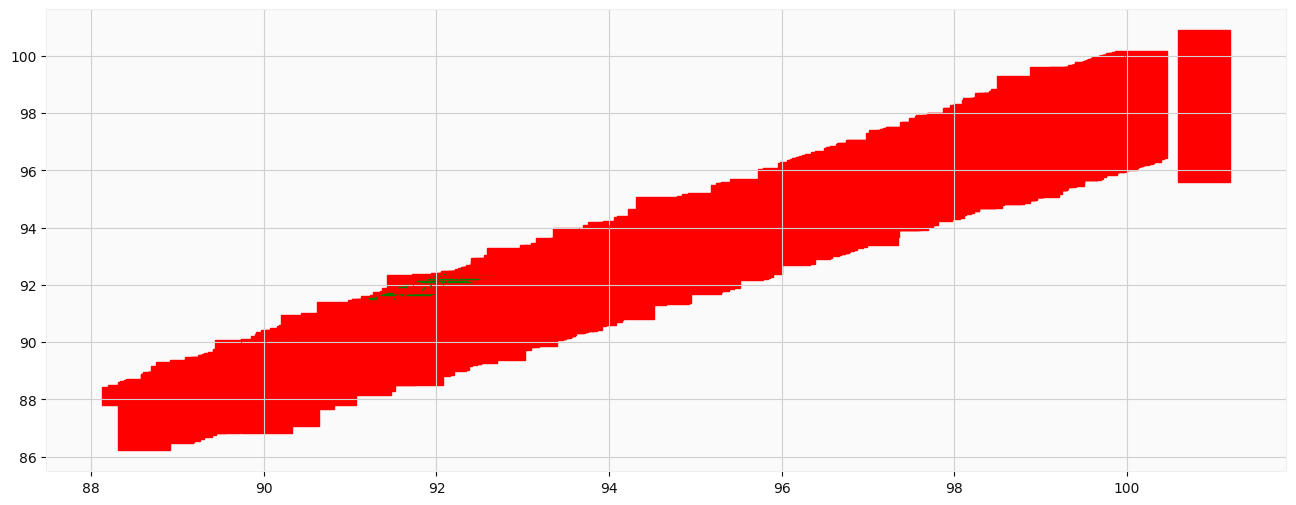

In [34]:
from mplfinance.original_flavor import candlestick_ohlc
if not data_3.empty:
    _, ax = plt.subplots(1, 1, figsize=(16, 6))
    candlestick_ohlc(
        ax, 
        data_3.values,
        width=0.6, 
        colorup='g',
        colordown='r'
    );

In [35]:
from mplfinance.original_flavor import candlestick_ohlc
if data_4:
    _, ax = plt.subplots(1, 1, figsize=(16, 6))
    candlestick_ohlc(
        ax, 
        data_4.values,
        width=0.6, 
        colorup='g',
        colordown='r'
    );

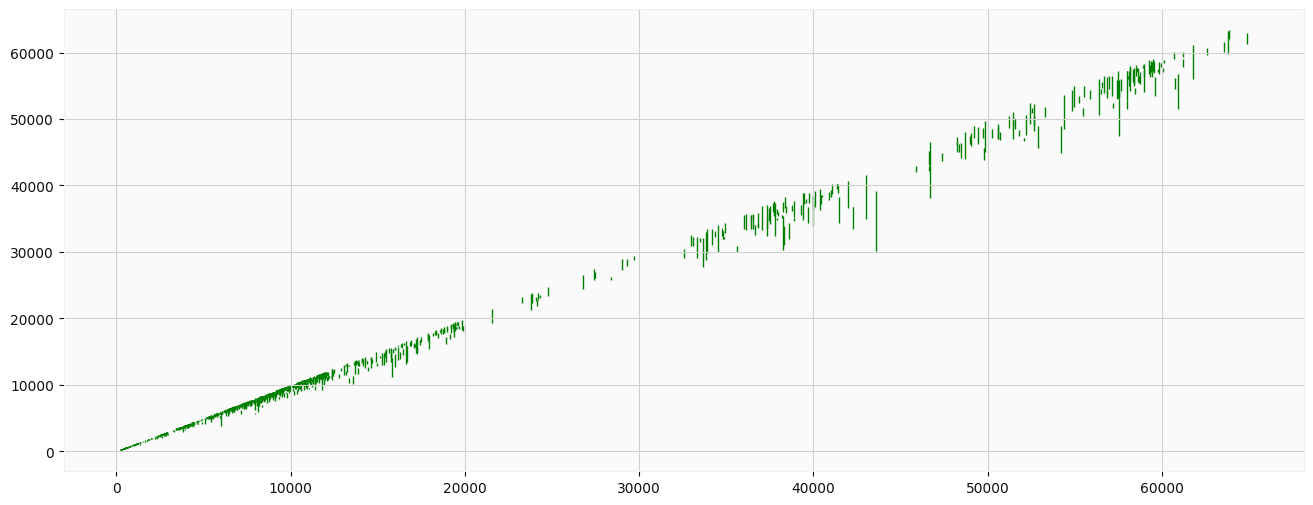

In [36]:
from mplfinance.original_flavor import candlestick_ohlc
if not data_6.empty:
    _, ax = plt.subplots(1, 1, figsize=(16, 6))
    candlestick_ohlc(
        ax, 
        data_6.values,
        width=0.6, 
        colorup='g',
        colordown='r'
    );